# Рунге для исходной системы

In [13]:
import numpy as np
import math
size = 3            # размерность системы

In [14]:
def fun(t, y):
    k = [0] * size
    k[0] = y[1] - y[0]          # y - x
    k[1] = math.cos(t) - y[0]   # cos - x
    k[2] = np.e ** y[0] * (1 + t * (y[1] - y[0]))   # (e ^ x) * (1 + t(y - x))
    return k

In [15]:
def answer(t):
    k = [0] * size
    k[0] = math.sin(t)
    k[1] = math.sin(t) + math.cos(t)
    k[2] = t * (np.e ** math.sin(t))
    return k

In [16]:
def Runge(t, y, h, count):  # t - значение узла, y - значения в точке t
    k = [[0] for _ in range(4)]
    y_temp = [0] * size
    y_result = [0] * size
    k[0] = fun(t, y)

    for i in range(size):
        y_temp[i] = y[i] + h / 2 * k[0][i]
    k[1] = fun(t + h / 2, y_temp)

    for i in range(size):
        y_temp[i] = y[i] + h / 2 * k[1][i]
    k[2] = fun(t + h / 2, y_temp)

    for i in range(size):
        y_temp[i] = y[i] + h * k[2][i]
    k[3] = fun(t + h, y_temp)

    for i in range(size):
        y_result[i] = y[i] + h * (k[0][i] + 2 * k[1][i] + 2 * k[2][i] + k[3][i]) / 6

    return y_result

In [17]:
t_min = 0
t_max = math.pi
count = 4           # количество узлов (кроме нулевого)
h = (t_max - t_min) / count
t = [(t_max - t_min) * i / count for i in range(count + 1)]

result = [[0, 1, 0]]

In [18]:
for i in range(count):
    result.append(Runge(t[i], result[i], h, count))

In [19]:
for i in result:
    print(round(i[0], 15))

0
0.707928544751102
1.003929375288795
0.713228585788697
0.004917171292085


In [20]:
for i in t:
    print(round(answer(i)[0], 15))

0.0
0.707106781186548
1.0
0.707106781186548
0.0


In [21]:
b = [0] * (count + 1)
for i in range(count + 1):
    b[i] = np.array(result[i][0]) - np.array(answer(t[i])[0]) 

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline
b

[0.0,
 0.0008217635645544341,
 0.003929375288795001,
 0.00612180460214895,
 0.0049171712920848985]

([<matplotlib.axis.YTick at 0x1db0b1fef60>,
 <a list of 5 Text yticklabel objects>)

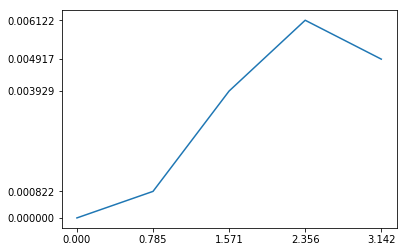

In [25]:
plt.plot(t, b)
plt.xticks(t)
plt.yticks(b)